In [1]:
import numpy as np
import pickle
from utils import train, evaluate
from scipy.optimize import minimize, minimize_scalar

In [2]:
def get_max(params):

    agent_id = params['agent1_id']
    # Define the function
    if agent_id == 'G':
        def f(vars):
            x, y = vars
            return  x*y - ( 0.1 * x**2 + 2 * x)
    elif agent_id == 'C':
        def f(vars):
            x, y = vars
            return   x*1/np.log(1+y)
    elif agent_id == 'J':
        def f(vars):
            x, y = vars
            return   x*1/np.log(1+y) + x*y - ( 0.1 * x**2 + 2 * x)
        
    # Bounds (choose a reasonable domain for x and y)
    bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]
    
    # To find max, minimize the negative of f
    res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)


    print("Maximum:")
    print(f"Point: {res_max.x}, Value: {-res_max.fun}")

  

In [3]:
def eval_performance(agent1, agent2, eval_params):
    power_hist = []
    price_hist = []

    for _ in range(100):
        gen_power, con_price = evaluate(agent1, agent2, eval_params, plot=False)
        power_hist.append(gen_power)
        price_hist.append(con_price)


    x = np.mean(power_hist)
    y = np.mean(price_hist)

    agent_id = eval_params['agent1_id']

    if agent_id == 'G':
        profit =  x*y - ( 0.1 * x**2 + 2 * x)
    elif agent_id == 'C':
        profit = x*1/np.log(1+y)
    elif agent_id == 'J':
        profit = x*1/np.log(1+y) + x*y - ( 0.1 * x**2 + 2 * x)

    print(f"Mean point: {x,y}, Value; {profit}")

In [4]:
params = {
    'total_steps': 50000,
    'eval_intervals': 1000,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'gen_threshold': -0.2,
    'con_threshold': 2,
    'agent1_actions': [-0.1, 0.0, 0.1],
    'agent2_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent1_id': 'G',
    'agent2_id': 'C'
}


Training Mode: MM: 100%|██████████| 50000/50000 [01:01<00:00, 817.46it/s, games_played=7600]


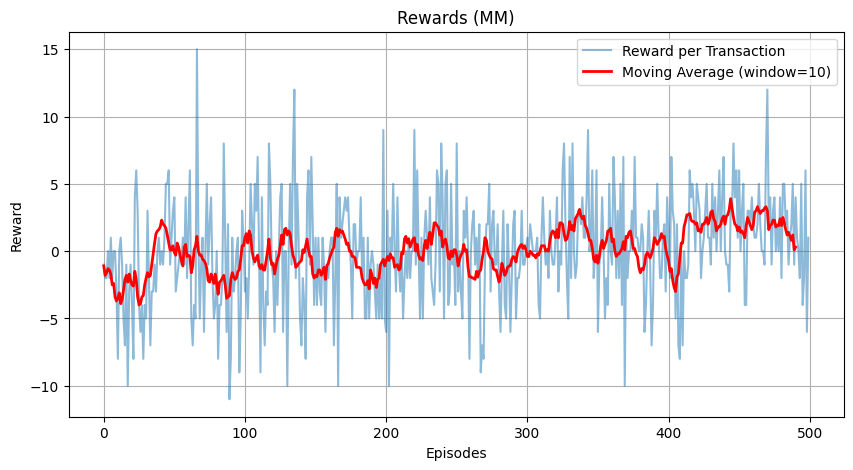

Playes games: A1=3804, A2=3796


In [9]:
MM_params = params.copy()
MM_params.update({
    'total_steps': 50000,
    'gen_threshold': -0.19,
    'con_threshold': 2,
    'agent1_id': 'G',
    'agent2_id': 'C'
})

agG_mm, agC_mm, reward_history, profit_history, ag1_win, ag2_win = train(mode='MM', kwargs=MM_params)

print(f'Playes games: A1={ag1_win}, A2={ag2_win}')

with open("agents/agG_mm.pkl", "wb") as f:
    pickle.dump(agG_mm, f)

with open("agents/agC_mm.pkl", "wb") as f:
    pickle.dump(agC_mm, f)


In [5]:
eval_params = params.copy()
eval_params.update({
    'total_steps': 100,
    'agent1_id': 'G',
    'agent2_id': 'C'
})

with open("agents/agG_mm.pkl", "rb") as f:
    agG_mm = pickle.load(f)

with open("agents/agC_mm.pkl", "rb") as f:
    agC_mm = pickle.load(f)

get_max(eval_params)
eval_performance(agG_mm, agC_mm, eval_params)

Maximum:
Point: [0.1 1. ], Value: -0.101
Mean point: (0.19620000000000004, 0.41440000000000005), Value; -0.314944164


Training Mode: MC:   0%|          | 0/50000 [00:00<?, ?it/s]

Training Mode: MC: 100%|██████████| 50000/50000 [00:33<00:00, 1506.24it/s, games_played=4368]


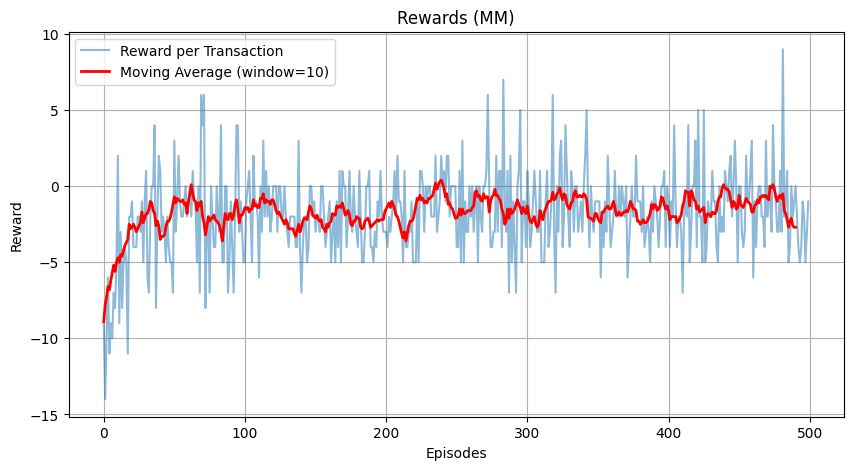

In [17]:
# Cargar
with open("agents/agG_mm.pkl", "rb") as f:
    trained_agent_G = pickle.load(f)

MC_params = params.copy()
MC_params.update({
    'total_steps': 50000,
    'agent1_id': 'C'
})

agC_MC, _ , reward_history, profit_history, ag1_win, ag2_win = train(mode='MC', kwargs=MC_params, train_agent=trained_agent_G)

with open("agents/agC_MC.pkl", "wb") as f:
    pickle.dump(agC_MC, f)

In [10]:
# Cargar
with open("agents/agG_mm.pkl", "rb") as f:
    trained_agent_G = pickle.load(f)

with open("agents/agC_MC.pkl", "rb") as f:
    agC_MC = pickle.load(f)

eval_params = params.copy()
eval_params.update({
    'total_steps': 100,
    'agent1_id': 'C',
    'agent2_id': 'G'
})

get_max(eval_params)
eval_performance(agC_MC, trained_agent_G, eval_params)

Maximum:
Point: [1.  0.1], Value: 10.492058687257062
Mean point: (0.3042, 0.5365), Value; 0.7082537126086029


Training Mode: MC: 100%|██████████| 50000/50000 [00:34<00:00, 1439.92it/s, games_played=8120]


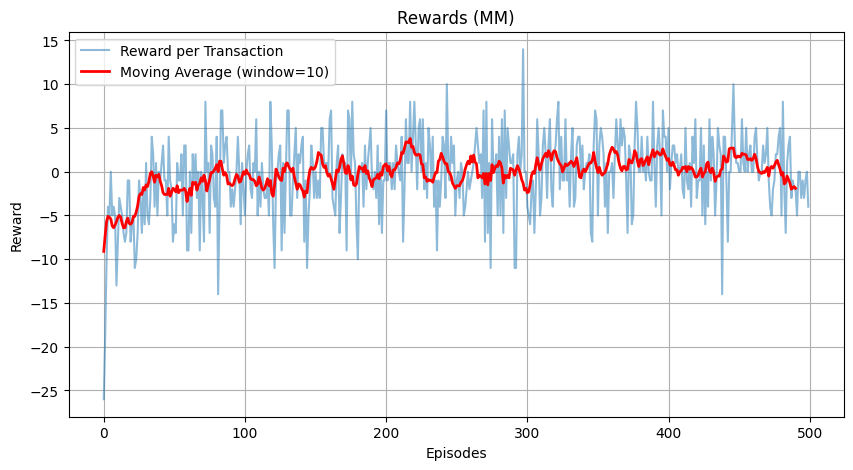

In [23]:

# Cargar
with open("agents/agC_mm.pkl", "rb") as f:
    trained_agent_C = pickle.load(f)

MC_params = params.copy()
MC_params.update({
    'total_steps': 50000,
    'agent1_id': 'G'
})

agG_MC, _ , reward_history, profit_history, ag1_win, ag2_win = train(mode='MC', kwargs=MC_params, train_agent=trained_agent_C)


with open("agents/agG_MC.pkl", "wb") as f:
    pickle.dump(agG_MC, f)


In [12]:

# Cargar
with open("agents/agG_MC.pkl", "rb") as f:
    agG_MC = pickle.load(f)

with open("agents/agC_mm.pkl", "rb") as f:
    trained_agent_C = pickle.load(f)

eval_params = params.copy()
eval_params.update({
    'total_steps': 100,
    'agent1_id': 'G',
    'agent2_id': 'C'
})

get_max(eval_params)
eval_performance(agG_MC, trained_agent_C, eval_params)

Maximum:
Point: [0.1 1. ], Value: -0.101
Mean point: (0.2745000000000001, 0.19200000000000006), Value; -0.5038310250000002


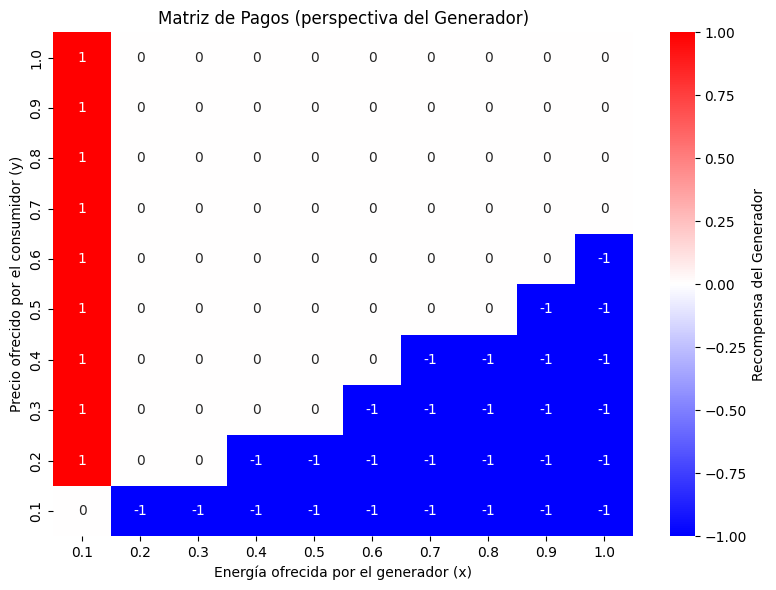

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nuevos rangos: ofertas pequeñas
x_vals = np.linspace(0.1, 1, 10)   # Energía ofrecida por el generador
y_vals = np.linspace(0.1, 1, 10)   # Precio ofrecido por el consumidor

# Umbrales de ganancia
theta_G = -0.19
theta_C = 2

# Crear la matriz de pagos desde la perspectiva del generador
n = len(x_vals)
m = len(y_vals)
A = np.zeros((n, m))

for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        # Ganancia del generador
        profit_G = x * y - (0.1 * x**2 + 2 * x)
        # Ganancia del consumidor
        if y > 0:
            profit_C = x / np.log(1 + y)
        else:
            profit_C = -np.inf  # evitar división por log(1+0)

        # Verificar si hay trato
        if profit_G > theta_G:
            A[i, j] = 1
        elif profit_C > theta_C:
            A[i, j] = -1
        else:
            A[i, j] = 0  # empate

# Transponer matriz y crear DataFrame
df = pd.DataFrame(A.T, index=np.round(y_vals, 2), columns=np.round(x_vals, 2))

# Visualizar la matriz de pagos con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="bwr", center=0, cbar_kws={'label': 'Recompensa del Generador'})
plt.xlabel("Energía ofrecida por el generador (x)")
plt.ylabel("Precio ofrecido por el consumidor (y)")
plt.title("Matriz de Pagos (perspectiva del Generador)")
plt.gca().invert_yaxis()  # opcional: invertir y para que precio bajo esté arriba
plt.tight_layout()
plt.show()
